In [1]:
#import relevant libraries: pip install re, pip install natsort, pip install plotly==5.10.0
import sys
import os
import glob

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import datetime as dt8
import math
import matplotlib.pyplot as plt
import decimal
import re
from natsort import index_natsorted
import dabest
import dabest_jck

import NLCLIMB 
import NLGRAPHS
import NLMATH

import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#NOTE: SUPPRESSES WARNINGS!

import warnings

warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [2]:
print(dabest.__version__)
print(np.version.version)
print(dabest_jck.__version__)

2024.03.29
1.23.5
2023.03.29


In [3]:
print('matplotlib: {}'.format(mpl.__version__))

matplotlib: 3.6.3


In [8]:
#initial file processing
computer1 = "C:\\Users\\User"
computer2 = "C:\\Users\\lnico"
homecomp = "D:"
filedir = "\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\Data Compilation\\Falling_New\\"
openPath = computer2 + filedir
files = os.listdir(openPath)

#identifying genotypes
responder = "ACR"
driver = "SS67727"

wt = "w1118"
transgenic = driver + " x " + responder
filename = openPath + transgenic + ".csv"
filenamewt = openPath + wt+"_"+ transgenic + ".csv"

print(filename)
print(filenamewt)

C:\Users\lnico\ACC Lab Dropbox\ACC Lab\Nicole Lee\Data Compilation\Falling_New\SS67727 x ACR.csv
C:\Users\lnico\ACC Lab Dropbox\ACC Lab\Nicole Lee\Data Compilation\Falling_New\w1118_SS67727 x ACR.csv


# functions

In [5]:
def falls(dfe_dark, dfe_full, dfw_dark, dfw_full):
    
    filtered = (dfe_dark.filter(regex="Fall.*").sum(axis=0))/1
    filtered2 = (dfe_full.filter(regex="Fall.*").sum(axis=0))/1
    filtered3 = (dfw_dark.filter(regex="Fall.*").sum(axis=0))/1
    filtered4 = (dfw_full.filter(regex="Fall.*").sum(axis=0))/1

    awt=pd.DataFrame()
    awt['Falls']=filtered
    awt['ExperimentState'] = "Dark"

    awt2=pd.DataFrame()
    awt2['Falls']=filtered2
    awt2['ExperimentState'] = "Full"


    awt2b = pd.concat([awt, awt2]).reset_index()
    awt2b["Type"] = "Expt"

    awt3=pd.DataFrame()
    awt3['Falls']=filtered3
    awt3['ExperimentState'] = "Dark"

    awt4=pd.DataFrame()
    awt4['Falls']=filtered4
    awt4['ExperimentState'] = "Full"
    awt4b = pd.concat([awt3, awt4]).reset_index()
    awt4b["Type"] = "WT"
    

    awt5=pd.DataFrame()
    awt5 = pd.concat([awt2b, awt4b])
    
    return awt5

def seap(dfexpt, phaser):
    phase = ['Dark', 'Full']
    squak = pd.DataFrame()
    for n in phase:
        fg = pd.DataFrame()
        gh = pd.DataFrame()
        pi = pd.DataFrame()
        dfe_dark = dfexpt[(dfexpt['ExperimentState']== n)] 
        fg['metric'] = dfe_dark.head(int(len(dfe_dark)/2)).filter(regex="Fall.*").sum(axis=0)
        fg['genre'] = n + " " + phaser + " 10"
        fg['time'] = 10
        gh['metric'] = dfe_dark.tail(int(len(dfe_dark)/2)).filter(regex="Fall.*").sum(axis=0)
        gh['genre'] = n + " " + phaser + " 20"
        gh['time']= 20
        pi = pd.concat([fg, gh], axis = 0)     
        pi['phase'] = n
        pi['type'] = phaser
        
        squak = pd.concat([squak, pi], axis = 0)
        
    return squak

def sean(dfexpt, phaser):
    phase = ['Dark', 'Full']
    squak = pd.DataFrame()
    for n in phase:
        fg = pd.DataFrame()
        gh = pd.DataFrame()
        pi = pd.DataFrame()
        dfe_dark = dfexpt[(dfexpt['ExperimentState']== n)] 
        fg['metric'] = dfe_dark.head(int(len(dfe_dark)/2)).filter(regex="Velocity.*").mean()
        fg['genre'] = n + " " + phaser + " 10"
        fg['time'] = 10
        gh['metric'] = dfe_dark.tail(int(len(dfe_dark)/2)).filter(regex="Velocity.*").mean()
        gh['genre'] = n + " " + phaser + " 20"
        gh['time']= 20
        pi = pd.concat([fg, gh], axis = 0)     
        pi['phase'] = n
        pi['type'] = phaser
        
        squak = pd.concat([squak, pi], axis = 0)
        
    return squak

def fallsr(dfe_dark, dfe_full, dfw_dark, dfw_full, dfer, dfwr):
    
    filtered = (dfe_dark.filter(regex="Fall.*").sum(axis=0))/1
    filtered2 = (dfe_full.filter(regex="Fall.*").sum(axis=0))/1
    filtered3 = (dfw_dark.filter(regex="Fall.*").sum(axis=0))/1
    filtered4 = (dfw_full.filter(regex="Fall.*").sum(axis=0))/1
    
    filtered5 = (dfer.filter(regex="Fall.*").sum(axis=0))/1
    filtered6 = (dfwr.filter(regex="Fall.*").sum(axis=0))/1

    awt=pd.DataFrame()
    awt['Falls']=filtered
    awt['ExperimentState'] = "Dark Expt"

    awt2=pd.DataFrame()
    awt2['Falls']=filtered2
    awt2['ExperimentState'] = "Full Expt"
    
    awtt=pd.DataFrame()
    awtt['Falls']=filtered5
    awtt['ExperimentState'] = "Recovery Expt"

    awt2b = pd.concat([awt, awt2, awtt]).reset_index()
    awt2b["Type"] = "Expt"

    awt3=pd.DataFrame()
    awt3['Falls']=filtered3
    awt3['ExperimentState'] = "Dark WT"
    
    awty=pd.DataFrame()
    awty['Falls']=filtered6
    awty['ExperimentState'] = "Recovery WT"

    awt4=pd.DataFrame()
    awt4['Falls']=filtered4
    awt4['ExperimentState'] = "Full WT"
    awt4b = pd.concat([awt3, awt4, awty]).reset_index()
    awt4b["Type"] = "WT"
    

    awt5=pd.DataFrame()
    awt5 = pd.concat([awt2b, awt4b])
    
    return awt5

def separation(dfexpt, dfwt, phrase):
    import pandas as pd
    import numpy as np 
        
    dfe_dark = dfexpt[(dfexpt['ExperimentState']== 'Dark')] 
    dfe_full = dfexpt[(dfexpt['ExperimentState']== 'Full')] 
    dfw_dark = dfwt[(dfwt['ExperimentState']== 'Dark')] 
    dfw_full = dfwt[(dfwt['ExperimentState']== 'Full')] 
    
    filterword = phrase + ".*"
    
    expts = [dfe_dark, dfe_full, dfw_dark, dfw_full]
    results = []
    for e in expts:
        filtereddf = e.filter(regex=filterword)
    
        match phrase:
            case "Y":
                result = getattr(filtereddf, "mean")(axis=0)
            case "Fall":
                result = getattr(filtereddf, "sum")(axis=0)/1
                
        results.append(result)
        
    awt=pd.DataFrame()
    awt[phrase]= results[0]
    awt['ExperimentState'] = "Dark"

    awt2=pd.DataFrame()
    awt2[phrase]=results[1]
    awt2['ExperimentState'] = "Full"

    awt2b = pd.concat([awt, awt2]).reset_index()
    awt2b["Type"] = "Expt"


    awt3=pd.DataFrame()
    awt3[phrase]=results[2]
    awt3['ExperimentState'] = "Dark"

    awt4=pd.DataFrame()
    awt4[phrase]=results[3]
    awt4['ExperimentState'] = "Full"
    awt4b = pd.concat([awt3, awt4]).reset_index()
    awt4b["Type"] = "WT"
    

    awt5=pd.DataFrame()
    awt5 = pd.concat([awt2b, awt4b])
    
    return awt5

def totalheight(dfexpt, dfwt, driver):
    
    awt5 = separation(dfexpt, dfwt, "Y")
    awt5.loc[awt5['Type'] == 'Expt', 'Type'] = driver
    awt5['genre'] = awt5['ExperimentState'] + " " + awt5['Type']

    return awt5

# total to run before graphs

In [9]:
dfe=pd.read_csv(filename)
dfw= pd.read_csv(filenamewt)

exptdf = dfe.drop(dfe.columns[[0]],axis = 1)
wtdf = dfw.drop(dfw.columns[[0]],axis = 1)

dfexpt = NLCLIMB.fivesecondrule(NLCLIMB.generation(exptdf, driver))
dfwt = NLCLIMB.fivesecondrule(NLCLIMB.generation(wtdf, wt))


#falls

dfe_F = NLMATH.falldbest(dfexpt, "Expt")
dfw_F = NLMATH.falldbest(dfwt, "WT")

awt5 = pd.concat([dfe_F, dfw_F], axis = 0).reset_index(drop = True)
awt5['genre'] = awt5['ExperimentState'] + " " + awt5['Type']
awt5['value'] = 0
awt5.loc[(awt5['Falls'] >0), ['value']] = 1

paired_prop2 = dabest_jck.load(data = awt5,idx=(("Dark WT", "Full WT"),("Dark Expt", "Full Expt")),
                              paired = "baseline", id_col="index",proportional=True,
                              x = "genre", y = "value")

#avg height
totalclimb = totalheight(dfexpt, dfwt, driver)

totalclimber = dabest.load(data=totalclimb, x=["ExperimentState","Type"], y= "Y", delta2 = True, 
                           experiment="Type",experiment_label = ["WT", driver], x1_level = ["Dark","Full"], 
                           paired = "sequential", id_col = "index")

##
df_se = NLMATH.velodabest(dfexpt, "Expt", "Velocity.*")
df_sw = NLMATH.velodabest(dfwt, "WT", "Velocity.*")

fgt6=pd.DataFrame()
fgt6 = pd.concat([df_se, df_sw]).reset_index(drop=False)
fgt6.loc[fgt6['Type'] == 'Expt', 'Type'] = driver
fgt6['genre'] = fgt6['ExperimentState'] + " " + fgt6['Type']
fgt6 = fgt6[(fgt6['ExperimentState'] != "Recovery") ]

#overallspeed
overallspeed = dabest.load(data=fgt6, x=["ExperimentState","Type"], y="Velocity.*", delta2 = True, experiment="Type", 
                               experiment_label = ["WT", driver], x1_level = ["Dark","Full"], paired = "baseline", id_col = "index")



# Graphs

c:\Users\lnico\anaconda3\Lib\site-packages\dabest\plot_tools.py:1232: UserWarning: 1.9% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


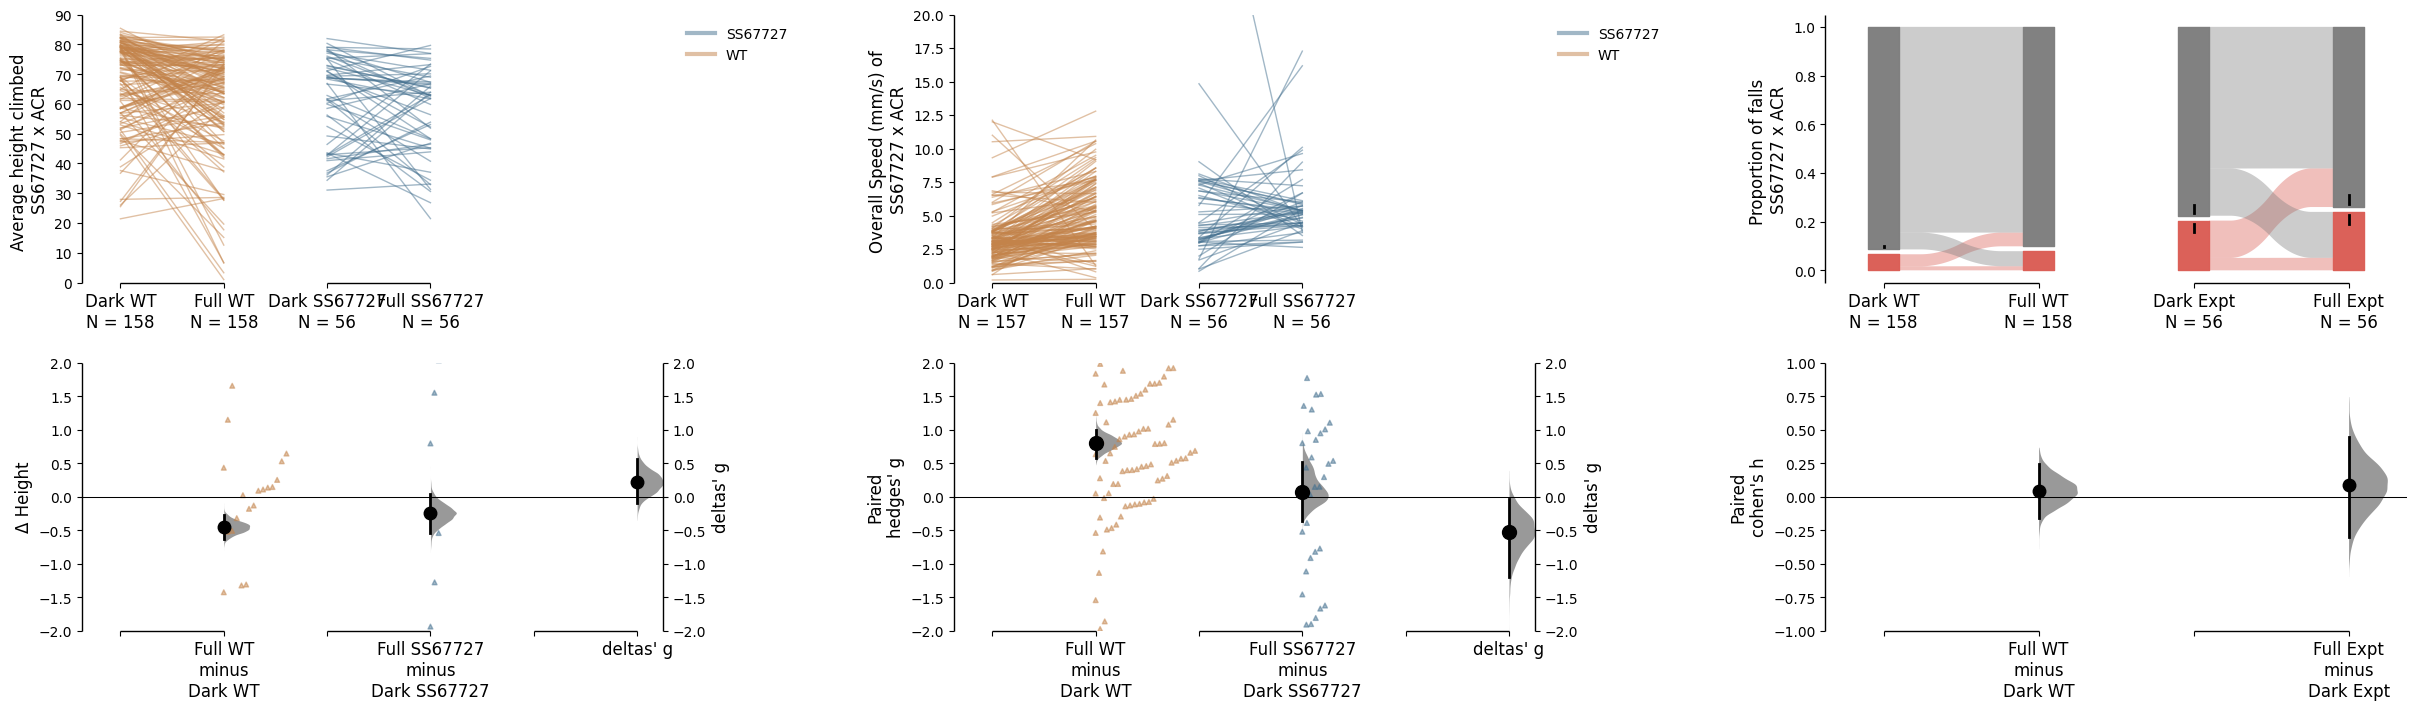

In [10]:
import seaborn as sns
f, axx = plt.subplots(nrows=1, ncols=3,
                    figsize=(30
                             ,8),
                    gridspec_kw={'wspace': 0.5
                                } # ensure proper width-wise spacing.
                   )


totalclimber.delta_g.plot(swarm_label="Average height climbed \n" + transgenic,
                                    contrast_label="Δ Height", swarm_ylim = (0,90), contrast_ylim=(-2, 2), ax=axx.flat[0]);


overallspeed.delta_g.plot(swarm_label="Overall Speed (mm/s) of \n" + transgenic ,
                                       es_marker_size=10, swarm_ylim=(0,20), contrast_ylim=(-2, 2), ax=axx.flat[1]);       #contrast_label="Δ Speed",

paired_prop2.cohens_h.plot(bar_label = "Proportion of falls \n" + transgenic,contrast_ylim=(-1, 1), ax=axx.flat[2]);

##need to run this
# deltaplots.delta_g.plot(swarm_label="Falling occurence of \n" + transgenic,
#                                      contrast_label="Δ Falls", raw_marker_size=2, es_marker_size=10, swarm_ylim=(0,5), contrast_ylim=(-2, 2), ax=axx.flat[2]);

In [41]:
f.savefig(openPath + 'images\\threedabestplots_20230915' +  transgenic + ".svg", dpi = 600)